# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import folium

# Import and Cleansing Data

In [2]:
df = pd.read_csv('/kaggle/input/transjakarta-transportation-transaction/dfTransjakarta180kRows.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.891650,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.899090,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.862980,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.869350,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.992150,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.996830,9.0,2023-04-03 06:01:23,20000.0
3,ZZBX143N6N83HQ,4486493302356581,dki,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.782130,16,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.768890,26.0,2023-04-03 06:01:25,3500.0
4,EWEG491A2W45DR,30139379978125,bni,"dr. Mulyanto Pudjiastuti, M.Ak",F,1997,NaN,NaN,0.0,NaN,...,106.835140,2,2023-04-03 06:00:54,B02755P,Perpustakaan Nasional,-6.180673,106.826430,5.0,2023-04-03 06:47:32,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189495,AEQP180C2Q77IS,378254320267609,emoney,"R.A. Malika Samosir, S.Kom",M,1998,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B06271P,...,106.852860,24,2023-04-02 13:00:49,B03318P,Sawo Kecik Raya,-6.224852,106.854890,34.0,2023-04-02 14:54:30,0.0
189496,PJOF006Z8Q63II,5406087682675422,dki,Amalia Gunarto,M,1981,9C,Pinang Ranti - Bundaran Senayan,1.0,P00040,...,106.858140,9,2023-04-04 17:31:55,P00030,Cawang Ciliwung Arah Timur,-6.243012,106.863540,10.0,2023-04-04 18:38:31,3500.0
189497,NTSG621H8U49WW,4674674527076302608,brizzi,R.A. Lintang Wibisono,F,1998,6T,Pasar Minggu - Velbak,1.0,B06746P,...,106.808665,17,2023-04-05 10:37:19,B06750P,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811,19.0,2023-04-05 12:20:28,3500.0
189498,PUNA543S2M10LX,4952762933693,online,Yunita Sitompul,F,1984,2,Pulo Gadung - Monas,1.0,P00005,...,106.888800,12,2023-04-14 13:34:20,P00192,Pulo Gadung 1,-6.183239,106.909070,15.0,2023-04-14 16:05:12,3500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189500 entries, 0 to 189499
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transID           189500 non-null  object 
 1   payCardID         189500 non-null  int64  
 2   payCardBank       189500 non-null  object 
 3   payCardName       189500 non-null  object 
 4   payCardSex        189500 non-null  object 
 5   payCardBirthDate  189500 non-null  int64  
 6   corridorID        182520 non-null  object 
 7   corridorName      175972 non-null  object 
 8   direction         189500 non-null  float64
 9   tapInStops        182259 non-null  object 
 10  tapInStopsName    189500 non-null  object 
 11  tapInStopsLat     189500 non-null  float64
 12  tapInStopsLon     189500 non-null  float64
 13  stopStartSeq      189500 non-null  int64  
 14  tapInTime         189500 non-null  object 
 15  tapOutStops       177131 non-null  object 
 16  tapOutStopsName   18

In [4]:
df_droped = df.dropna()
df_droped

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.891650,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.899090,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.862980,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.869350,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.992150,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.996830,9.0,2023-04-03 06:01:23,20000.0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.896380,17,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.893310,21.0,2023-04-03 05:41:04,0.0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,106.793520,5,2023-04-03 06:21:07,P00170,Penjaringan,-6.126306,106.792030,7.0,2023-04-03 06:52:58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189495,AEQP180C2Q77IS,378254320267609,emoney,"R.A. Malika Samosir, S.Kom",M,1998,JAK.43B,Tongtek - Tebet Eco Park (TEP) - Cililitan,1.0,B06271P,...,106.852860,24,2023-04-02 13:00:49,B03318P,Sawo Kecik Raya,-6.224852,106.854890,34.0,2023-04-02 14:54:30,0.0
189496,PJOF006Z8Q63II,5406087682675422,dki,Amalia Gunarto,M,1981,9C,Pinang Ranti - Bundaran Senayan,1.0,P00040,...,106.858140,9,2023-04-04 17:31:55,P00030,Cawang Ciliwung Arah Timur,-6.243012,106.863540,10.0,2023-04-04 18:38:31,3500.0
189497,NTSG621H8U49WW,4674674527076302608,brizzi,R.A. Lintang Wibisono,F,1998,6T,Pasar Minggu - Velbak,1.0,B06746P,...,106.808665,17,2023-04-05 10:37:19,B06750P,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811,19.0,2023-04-05 12:20:28,3500.0
189498,PUNA543S2M10LX,4952762933693,online,Yunita Sitompul,F,1984,2,Pulo Gadung - Monas,1.0,P00005,...,106.888800,12,2023-04-14 13:34:20,P00192,Pulo Gadung 1,-6.183239,106.909070,15.0,2023-04-14 16:05:12,3500.0


In [5]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153963 entries, 0 to 189499
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transID           153963 non-null  object 
 1   payCardID         153963 non-null  int64  
 2   payCardBank       153963 non-null  object 
 3   payCardName       153963 non-null  object 
 4   payCardSex        153963 non-null  object 
 5   payCardBirthDate  153963 non-null  int64  
 6   corridorID        153963 non-null  object 
 7   corridorName      153963 non-null  object 
 8   direction         153963 non-null  float64
 9   tapInStops        153963 non-null  object 
 10  tapInStopsName    153963 non-null  object 
 11  tapInStopsLat     153963 non-null  float64
 12  tapInStopsLon     153963 non-null  float64
 13  stopStartSeq      153963 non-null  int64  
 14  tapInTime         153963 non-null  object 
 15  tapOutStops       153963 non-null  object 
 16  tapOutStopsName   15

# EDA

## Customer Charactersitic

In [6]:
df1 = df_droped

In [7]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount'],
      dtype='object')

In [8]:
df1.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.89165,12,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.86298,27,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.99215,6,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.89638,17,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,106.79352,5,2023-04-03 06:21:07,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0


In [9]:
df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
df1['tapDay'] = df1['tapInTime'].dt.dayofweek
df1.head()

/tmp/ipykernel_20/3235624465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInTime'] = pd.to_datetime(df1['tapInTime'])
/tmp/ipykernel_20/3235624465.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutTime'] = pd.to_datetime(df1['tapOutTime'])
/tmp/ipykernel_20/3235624465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,0


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153963 entries, 0 to 189499
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           153963 non-null  object        
 1   payCardID         153963 non-null  int64         
 2   payCardBank       153963 non-null  object        
 3   payCardName       153963 non-null  object        
 4   payCardSex        153963 non-null  object        
 5   payCardBirthDate  153963 non-null  int64         
 6   corridorID        153963 non-null  object        
 7   corridorName      153963 non-null  object        
 8   direction         153963 non-null  float64       
 9   tapInStops        153963 non-null  object        
 10  tapInStopsName    153963 non-null  object        
 11  tapInStopsLat     153963 non-null  float64       
 12  tapInStopsLon     153963 non-null  float64       
 13  stopStartSeq      153963 non-null  int64         
 14  tapI

In [11]:
df1['tapDay'] = df1['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})
df1.head()

/tmp/ipykernel_20/2579178386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapDay'] = df1['tapDay'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'})


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,Monday
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,Monday
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,Monday
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,Monday
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,Monday


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153963 entries, 0 to 189499
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           153963 non-null  object        
 1   payCardID         153963 non-null  int64         
 2   payCardBank       153963 non-null  object        
 3   payCardName       153963 non-null  object        
 4   payCardSex        153963 non-null  object        
 5   payCardBirthDate  153963 non-null  int64         
 6   corridorID        153963 non-null  object        
 7   corridorName      153963 non-null  object        
 8   direction         153963 non-null  float64       
 9   tapInStops        153963 non-null  object        
 10  tapInStopsName    153963 non-null  object        
 11  tapInStopsLat     153963 non-null  float64       
 12  tapInStopsLon     153963 non-null  float64       
 13  stopStartSeq      153963 non-null  int64         
 14  tapI

In [13]:
customer = df1[['payCardName', 'payCardBirthDate', 'payCardBank', 'payCardSex']]
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153963 entries, 0 to 189499
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   payCardName       153963 non-null  object
 1   payCardBirthDate  153963 non-null  int64 
 2   payCardBank       153963 non-null  object
 3   payCardSex        153963 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


Dataset yang digunakan merupakan dataset setiap tap sepanjang waktu yang artinya akan ada duplikasi customer. Maka disini akan dilakukan penghilangan duplikasi berdasarkan nama pengguna.

In [14]:
customer = customer.drop_duplicates(subset='payCardName', keep='first', ignore_index=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   payCardName       9449 non-null   object
 1   payCardBirthDate  9449 non-null   int64 
 2   payCardBank       9449 non-null   object
 3   payCardSex        9449 non-null   object
dtypes: int64(1), object(3)
memory usage: 295.4+ KB


In [15]:
customer.head()

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M
1,Balamantri Rahayu,2002,emoney,M
2,Dian Mustofa,1993,emoney,F
3,"Dasa Prakasa, S.I.Kom",1993,bni,F
4,Elvina Hasanah,1966,dki,M


In [16]:
customer

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M
1,Balamantri Rahayu,2002,emoney,M
2,Dian Mustofa,1993,emoney,F
3,"Dasa Prakasa, S.I.Kom",1993,bni,F
4,Elvina Hasanah,1966,dki,M
...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",1998,emoney,M
9445,Amalia Gunarto,1981,dki,M
9446,R.A. Lintang Wibisono,1998,brizzi,F
9447,Yunita Sitompul,1984,online,F


In [17]:
customer

,payCardName,payCardBirthDate,payCardBank,payCardSex
0,"Dr. Janet Nashiruddin, M.Ak",2010,dki,M
1,Balamantri Rahayu,2002,emoney,M
2,Dian Mustofa,1993,emoney,F
3,"Dasa Prakasa, S.I.Kom",1993,bni,F
4,Elvina Hasanah,1966,dki,M
...,...,...,...,...
9444,"R.A. Malika Samosir, S.Kom",1998,emoney,M
9445,Amalia Gunarto,1981,dki,M
9446,R.A. Lintang Wibisono,1998,brizzi,F
9447,Yunita Sitompul,1984,online,F


## Traffic  Analysis

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153963 entries, 0 to 189499
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transID           153963 non-null  object        
 1   payCardID         153963 non-null  int64         
 2   payCardBank       153963 non-null  object        
 3   payCardName       153963 non-null  object        
 4   payCardSex        153963 non-null  object        
 5   payCardBirthDate  153963 non-null  int64         
 6   corridorID        153963 non-null  object        
 7   corridorName      153963 non-null  object        
 8   direction         153963 non-null  float64       
 9   tapInStops        153963 non-null  object        
 10  tapInStopsName    153963 non-null  object        
 11  tapInStopsLat     153963 non-null  float64       
 12  tapInStopsLon     153963 non-null  float64       
 13  stopStartSeq      153963 non-null  int64         
 14  tapI

In [19]:
df1['tapInHour'] = df1['tapInTime'].dt.hour
df1['tapOutHour'] = df1['tapOutTime'].dt.hour
df1['tapOutHour'] = df1['tapOutHour'].replace(0, 24)
df1['tripDuration'] = df1['tapOutHour'] - df1['tapInHour']
df1.head()

/tmp/ipykernel_20/3311007999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapInHour'] = df1['tapInTime'].dt.hour
/tmp/ipykernel_20/3311007999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tapOutHour'] = df1['tapOutTime'].dt.hour
/tmp/ipykernel_20/3311007999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapDay,tripDuration
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0,6,7,Monday,1
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0,5,6,Monday,1
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0,5,6,Monday,1
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0,5,5,Monday,0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0,6,6,Monday,0


In [20]:
df1.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime',
       'payAmount', 'tapInHour', 'tapOutHour', 'tapDay', 'tripDuration'],
      dtype='object')

In [21]:
df1.tripDuration.unique()

array([1, 0, 2, 3])

### Trip Duration Analysis

In [22]:
df1['tripDuration'].describe()

count    153963.000000
mean          1.203484
std           0.621669
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: tripDuration, dtype: float64

Rata-rata durasi perjalanan sebesar 1.2 jam atau 1 jam 12 menit dengan durasi tersingkat kutang dari 1 jam dan terlama yaitu 3 jam.

In [23]:
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='tripDuration', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Departemen Kesehatan,Karet Kuningan,3,1
1,Pasar Kebayoran Lama,Tomang Mandala,3,1
2,Graha Werdatama Pondok Labu,Simpang Pinang I Pondok Labu,3,1
3,Pool Taksi Tanah Kusir,Masjid Raya Nurul Hidayah,3,1
4,Ir H Djuanda,Pintu Tol Cijago,3,1
...,...,...,...,...
28344,Semanggi,Dukuh Atas,0,5
28345,Rest Area TMII,Rest Area Cibubur,0,1
28346,Jelambar,Indosiar,0,1
28347,Semanggi,Cawang UKI,0,5


In [24]:
df1.groupby(['tapInStopsName', 'tapOutStopsName', 'tripDuration'])['transID'].count().reset_index(name='trip').sort_values(by='trip', ascending=False, ignore_index=True)

,tapInStopsName,tapOutStopsName,tripDuration,trip
0,Penjaringan,Rusun Penjaringan,1,310
1,Rusun Penjaringan,Penjaringan,1,306
2,Rusun Kapuk Muara,Penjaringan,1,261
3,Penjaringan,Rusun Kapuk Muara,1,251
4,Cibubur Junction,BKN,1,199
...,...,...,...,...
28344,PLTU Pluit,Pelabuhan Kali Adem,0,1
28345,PLTU Pluit,Pluit Karang Indah,2,1
28346,PLTU Pluit,RS PIK 2,2,1
28347,PLTU Pluit,Sbr. Baywalk 1,1,1


### Berapa tap di tiap halte?

In [25]:
transcount = pd.DataFrame(df1[['tapInStopsName', 'tapOutStopsName']].groupby(['tapInStopsName', 'tapOutStopsName']).size().reset_index(name='TransactionCount').sort_values(by='TransactionCount', ascending=False, ignore_index=True))
transcount

,tapInStopsName,tapOutStopsName,TransactionCount
0,Penjaringan,Rusun Penjaringan,555
1,Rusun Penjaringan,Penjaringan,547
2,Rusun Kapuk Muara,Penjaringan,467
3,Penjaringan,Rusun Kapuk Muara,443
4,Cibubur Junction,BKN,373
...,...,...,...
16407,Polda Metro Jaya,Masjid Agung,1
16408,Gempol Baru 2,Sbr. Rukem Jaya 1,1
16409,Gempol Baru 2,Rorotan IX Gg. V,1
16410,Polda Metro Jaya 1,Kejaksaan Agung,1


Kapan waktu terpadat dari 5 halte teratas?

In [26]:
tapIn_counts = df1.groupby('tapInStopsName').size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head(10)

,tapInStopsName,tapInCounts
0,Penjaringan,1169
1,BKN,655
2,BNN LRT,625
3,Rusun Penjaringan,547
4,Garuda Taman Mini,544
5,BNN Arah Barat,490
6,Rusun Kapuk Muara,467
7,Cibubur Junction,461
8,Duren Tiga,428
9,Penggilingan,408


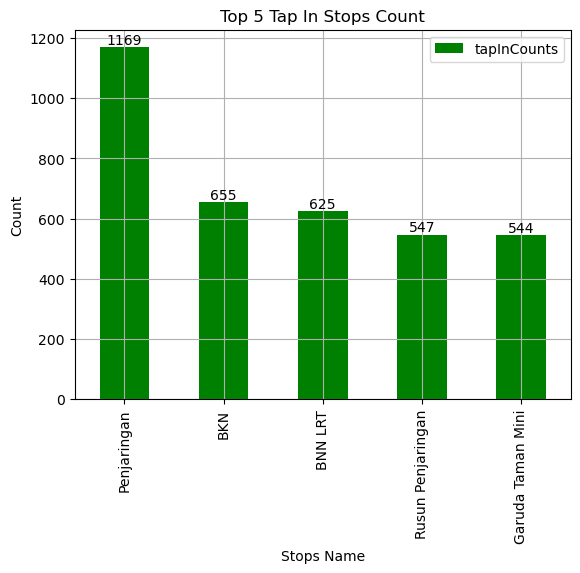

In [27]:
t = tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).head()
ax = t.plot(x='tapInStopsName', kind='bar', color='green')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapInCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap In Stops Count')
plt.show()

In [28]:
tapIn_counts = df1.groupby(['tapInStopsName', 'tapInHour']).size().reset_index(name='tapInCounts')
# tapIn_counts.rename(columns={'tapInStopsName' : 'stopsName'}, inplace=True)
tapIn_counts.sort_values(by='tapInCounts', ascending=False, ignore_index=True).drop_duplicates(subset='tapInStopsName', keep='first')

,tapInStopsName,tapInHour,tapInCounts
0,Penjaringan,17,205
1,BKN,6,155
4,BNN LRT,17,118
5,Rusun Penjaringan,6,112
7,Cibubur Junction,17,99
...,...,...,...
28585,RSIA Bunda 2,13,1
28587,RSIA Bunda Aliyah 2,6,1
28593,RSIA Duren Tiga 2,20,1
28601,Gg. H. Emur Pondok Labu,5,1


Tap In terbanyak terjadi pada halte Penjaringan pada jam 5 sore, halte BKN pada jam 6 pagi, halte BNN LRT pada jam 5 sore, halte Rusun Penjaringan pada jam 6 pagi dan halte Cibubur Junction pad jam 5 sore.

In [29]:
tapOut_counts = df1.groupby(['tapOutStopsName', 'tapOutHour']).size().reset_index(name='tapOutCounts')
tapOut_counts.rename(columns={'tapOutStopsName' : 'stopsName'}, inplace=True)
t = tapOut_counts.sort_values(by='tapOutCounts', ascending=False, ignore_index=True).head()
t

,stopsName,tapOutHour,tapOutCounts
0,Penjaringan,6,201
1,BKN,18,175
2,Penjaringan,7,171
3,Penjaringan,18,144
4,BKN,7,132


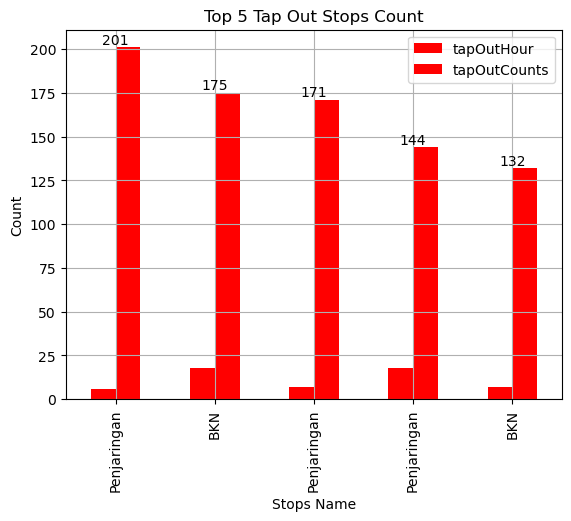

In [30]:
ax = t.plot(x='stopsName', kind='bar', color='red')
# Menambahkan teks di atas setiap bar
for i, v in enumerate(t['tapOutCounts']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.grid()
plt.xlabel('Stops Name')
plt.ylabel('Count')
plt.title('Top 5 Tap Out Stops Count')
plt.show()

Sedangkan tapOut terbanyak terjadi pada Halte Penjaringan pada jam 6  dan 7 pagi serta jam 6 sore, dan halte BKN sebanyak 175 pada jam 7 pagi dan jam 6 sore.

Koordinat 5 Halte terpadat

In [31]:
cor = df1[['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']]
cor.drop_duplicates(inplace=True, ignore_index=True)
cor

/tmp/ipykernel_20/2110421905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor.drop_duplicates(inplace=True, ignore_index=True)


,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon
0,Pemuda Rawamangun,-6.193488,106.891650,Layur,-6.193539,106.899090
1,Sekolah Islam PB Soedirman,-6.314293,106.862980,Jln. Ar Ridho,-6.308148,106.869350
2,Mall Metropolitan,-6.247861,106.992150,Bandar Djakarta Bekasi,-6.227085,106.996830
3,Sbr. RPTRA Radar Pembangunan,-6.120126,106.896380,Simpang Gotong Royong 2,-6.125482,106.893310
4,Jembatan Dua,-6.143279,106.793520,Penjaringan,-6.126306,106.792030
...,...,...,...,...,...,...
16409,Gg. Ampera BMW Astra,-6.292546,106.790025,Poins Square,-6.289207,106.777180
16410,Sbr. Madrasah Aliyah Citra Cendekia,-6.357553,106.800760,Tanah Baru Cipedak,-6.363462,106.806840
16411,Simpang Tebet Raya Timur 1,-6.229718,106.852860,Sawo Kecik Raya,-6.224852,106.854890
16412,Sbr. Jln. Pangeran Antasari,-6.275209,106.808665,Sbr. SDN Cilandak Barat 15,-6.288628,106.806811


In [32]:
res = cor.merge(transcount, on=['tapInStopsName', 'tapOutStopsName'])
res.sort_values(by='TransactionCount', ascending=False, ignore_index=True, inplace=True)
res

,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.79203,Rusun Penjaringan,-6.130702,106.79487,555
1,Rusun Penjaringan,-6.130702,106.79487,Penjaringan,-6.126306,106.79203,547
2,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,467
3,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,443
4,Cibubur Junction,-6.368735,106.89366,BKN,-6.257751,106.87000,373
...,...,...,...,...,...,...,...
16409,Ruko Taman Kb. Jeruk,-6.197388,106.74818,Simpang Jengkol Joglo 1,-6.219014,106.72985,1
16410,Sbr. Madrasah Hasanatuddarain,-6.221049,106.90458,Jln. Jatinegara Timur IV,-6.222457,106.86816,1
16411,Sbr. H. Samali,-6.265816,106.84420,Univ. Indonesia,-6.353357,106.83186,1
16412,RSUD Tarakan,-6.172239,106.81098,Univ. Trisakti 2,-6.166868,106.79098,1


In [33]:
top10 = res.head(10)
top10

,tapInStopsName,tapInStopsLat,tapInStopsLon,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,TransactionCount
0,Penjaringan,-6.126306,106.79203,Rusun Penjaringan,-6.130702,106.79487,555
1,Rusun Penjaringan,-6.130702,106.79487,Penjaringan,-6.126306,106.79203,547
2,Rusun Kapuk Muara,-6.135667,106.76299,Penjaringan,-6.126306,106.79203,467
3,Penjaringan,-6.126306,106.79203,Rusun Kapuk Muara,-6.135667,106.76299,443
4,Cibubur Junction,-6.368735,106.89366,BKN,-6.257751,106.87000,373
5,Buperta Cibubur,-6.370321,106.89628,Cibubur Junction,-6.368735,106.89366,317
6,Titan Center,-6.281076,106.72608,St. MRT Fatmawati,-6.292589,106.79360,307
7,Garuda Taman Mini,-6.290154,106.88116,Pinang Ranti,-6.291075,106.88634,235
8,Garuda Taman Mini,-6.290154,106.88116,BKN,-6.257751,106.87000,221
9,Walikota Jakarta Timur 1,-6.212327,106.94515,Rusun Rawa Bebek,-6.196241,106.96580,175


In [34]:
# Pusatkan peta pada koordinat tertentu (misalnya Jakarta)
center_latitude = -6.1751
center_longitude = 106.8272
zoom_level = 10
m = folium.Map(location=[center_latitude, center_longitude], zoom_start=zoom_level)

# Tambahkan marker pada setiap titik pemberhentian
for index, row in top10.iterrows():
    folium.Marker(
        location=[row['tapInStopsLat'], row['tapInStopsLon']],
        icon=folium.Icon(icon='cloud', color='green'),
        popup=row['tapInStopsName']
    ).add_to(m)

    folium.Marker(
        location=[row['tapOutStopsLat'], row['tapOutStopsLon']],
        icon=folium.Icon(icon='cloud', color='red'),
        popup=row['tapOutStopsName']
    ).add_to(m)

    # # Tambahkan polyline untuk menghubungkan titik-titik pemberhentian
    folium.PolyLine(
         locations=[[row['tapInStopsLat'], row['tapInStopsLon']], [row['tapOutStopsLat'], row['tapOutStopsLon']]],
         color='blue'
     ).add_to(m)

# Tampilkan peta
m

# Conclusion

Analisis OD TransJakarta mengungkap pola perjalanan, periode kepadatan tertinggi, dan halte dengan permintaan tinggi. Hasil menunjukkan bahwa beberapa rute memiliki arus penumpang yang sangat tinggi, dengan jam sibuk terjadi pada 06.00-07.00 pagi dan 17.00-18.00 sore. Rata-rata durasi perjalanan adalah 1,2 jam, dengan beberapa perjalanan mencapai 3 jam, yang mengindikasikan adanya ketidakefisienan dalam alokasi layanan. Optimalisasi jadwal bus dan redistribusi armada berdasarkan pola permintaan dapat meningkatkan efisiensi operasional dan pengalaman penumpang.